In [6]:
import gpflow
import numpy as np
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 6)
plt = matplotlib.pyplot

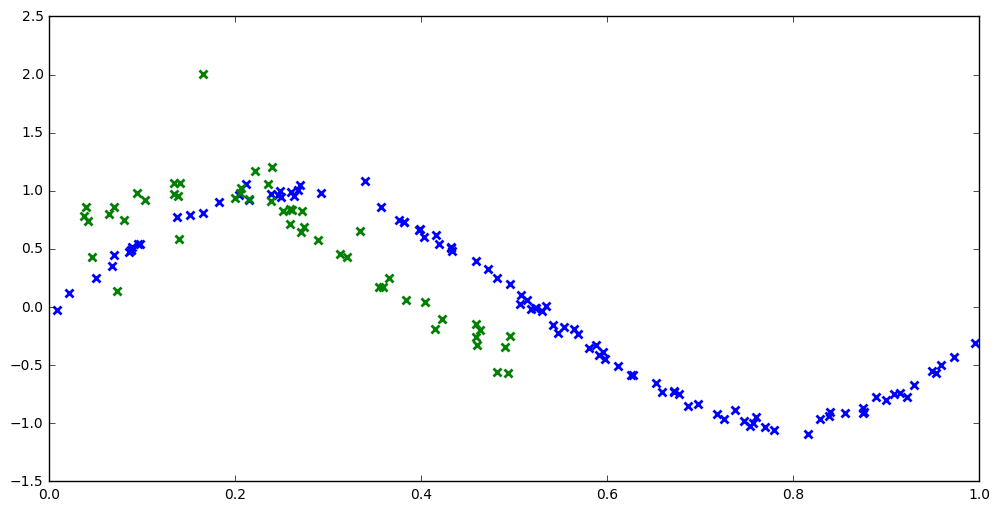

In [7]:
# make a dataset with two outputs, correlated, heavy-tail noise. One has more noise than the other.
X1 = np.random.rand(100, 1)
X2 = np.random.rand(50, 1) * 0.5
Y1 = np.sin(6*X1) + np.random.standard_t(3, X1.shape)*0.03
Y2 = np.sin(6*X2+ 0.7) + np.random.standard_t(3, X2.shape)*0.1

plt.plot(X1, Y1, 'x', mew=2)
plt.plot(X2, Y2, 'x', mew=2)

In [8]:

# a Coregionalization kernel. The base kernel is Matern, and acts on the first ([0]) data dimension.
# the 'Coregion' kernel indexes the outputs, and actos on the second ([1]) data dimension
k1 = gpflow.kernels.Matern32(1, active_dims=[0])
coreg = gpflow.kernels.Coregion(1, output_dim=2, rank=1, active_dims=[1])
kern = k1 * coreg

# build a variational model. This likelihood switches between Student-T noise with different variances:
lik = gpflow.likelihoods.SwitchedLikelihood([gpflow.likelihoods.StudentT(), gpflow.likelihoods.StudentT()])

# Augment the time data with ones or zeros to indicate the required output dimension
X_augmented = np.vstack((np.hstack((X1, np.zeros_like(X1))), np.hstack((X2, np.ones_like(X2)))))

# Augment the Y data to indicate which likeloihood we should use
Y_augmented = np.vstack((np.hstack((Y1, np.zeros_like(X1))), np.hstack((Y2, np.ones_like(X2)))))

# now buld the GP model as normal
m = gpflow.models.VGP(X_augmented, Y_augmented, kern=kern, likelihood=lik, num_latent=1)

In [9]:
# fit the covariance function parameters
gpflow.train.ScipyOptimizer().minimize(m)

C:\Users\Woojin Cho\AppData\Local\Continuum\Anaconda3\lib\site-packages\tensorflow\python\ops\gradients_impl.py:100: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: -157.746040
  Number of iterations: 911
  Number of functions evaluations: 980


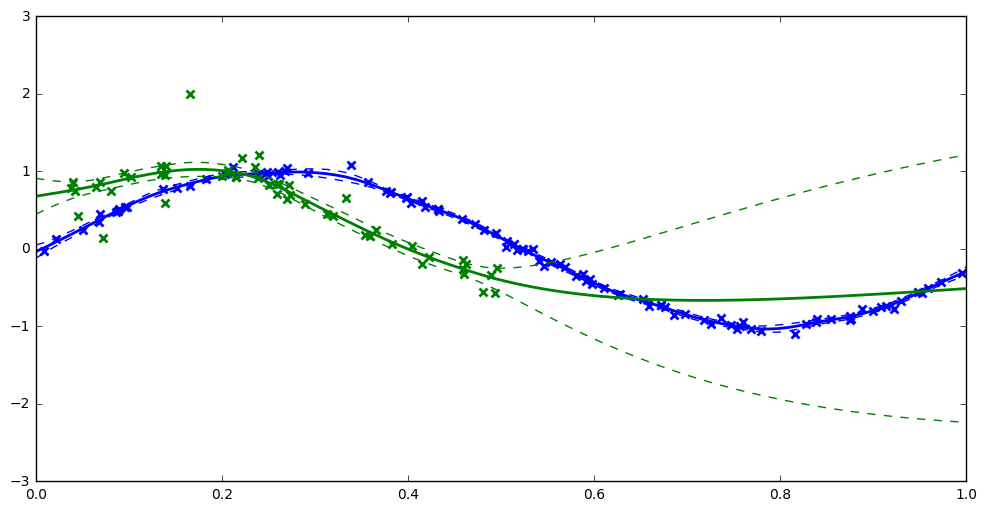

In [10]:
def plot_gp(x, mu, var, color='k'):
    plt.plot(x, mu, color=color, lw=2)
    plt.plot(x, mu + 2*np.sqrt(var), '--', color=color)
    plt.plot(x, mu - 2*np.sqrt(var), '--', color=color)

def plot(m):
    xtest = np.linspace(0, 1, 100)[:,None]
    line, = plt.plot(X1, Y1, 'x', mew=2)
    mu, var = m.predict_f(np.hstack((xtest, np.zeros_like(xtest))))
    plot_gp(xtest, mu, var, line.get_color())

    line, = plt.plot(X2, Y2, 'x', mew=2)
    mu, var = m.predict_f(np.hstack((xtest, np.ones_like(xtest))))
    plot_gp(xtest, mu, var, line.get_color())

plot(m)

In [11]:
m.kern.as_pandas_table()

,class,prior,transform,trainable,shape,fixed_shape,value
VGP/kern/matern32/variance,Parameter,None,+ve,True,(),True,0.9924475297543452
VGP/kern/matern32/lengthscales,Parameter,None,+ve,True,(),True,0.5399869739053164
VGP/kern/coregion/W,Parameter,None,(none),True,"(2, 1)",True,"[[0.0], [0.0]]"
VGP/kern/coregion/kappa,Parameter,None,+ve,True,"(2,)",True,"[0.8226436855287195, 1.1022072538193102]"


In [12]:
m.kern.coregion.W = np.random.randn(2, 1)

In [13]:
gpflow.train.ScipyOptimizer().minimize(m)

C:\Users\Woojin Cho\AppData\Local\Continuum\Anaconda3\lib\site-packages\tensorflow\python\ops\gradients_impl.py:100: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS EXCEEDS LIMIT'
  Objective function value: -159.033112
  Number of iterations: 1001
  Number of functions evaluations: 1077


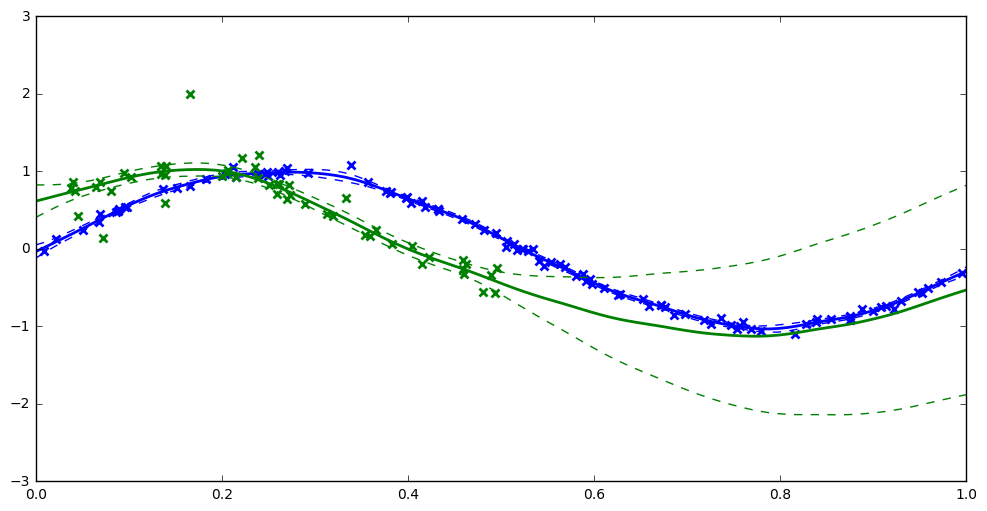

In [14]:
plot(m)

In [23]:
dat=pd.read_csv('20180225_EG.csv', sep=',',header=0)
DATA = dat.values[1:].astype(np.float)
n_sensor = np.shape(DATA)[1]

C:\Users\Woojin Cho\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [15]:
X_augmented

array([[0.74734036, 0.        ],
       [0.58025986, 0.        ],
       [0.20353358, 0.        ],
       [0.89973358, 0.        ],
       [0.39857712, 0.        ],
       [0.72599342, 0.        ],
       [0.26969107, 0.        ],
       [0.0951279 , 0.        ],
       [0.69760199, 0.        ],
       [0.50577668, 0.        ],
       [0.8884006 , 0.        ],
       [0.75320441, 0.        ],
       [0.49484867, 0.        ],
       [0.71772591, 0.        ],
       [0.06923576, 0.        ],
       [0.62587331, 0.        ],
       [0.29221742, 0.        ],
       [0.26282459, 0.        ],
       [0.54653157, 0.        ],
       [0.50672215, 0.        ],
       [0.37589685, 0.        ],
       [0.99542568, 0.        ],
       [0.24826999, 0.        ],
       [0.87547764, 0.        ],
       [0.62782547, 0.        ],
       [0.85510258, 0.        ],
       [0.94864239, 0.        ],
       [0.67145257, 0.        ],
       [0.39731599, 0.        ],
       [0.47185137, 0.        ],
       [0.

In [22]:
def build_XY(input_list, output_list):
    num_outputs = len(input_list)
    I = np.hstack( [np.repeat(j,_x.shape[0]) for _x,j in zip(input_list,range(num_outputs))] )
    X = np.vstack(input_list)
    X = np.hstack([X,I[:,None]])
    
    Y = np.vstack(output_list)
    Y = np.hstack([Y,I[:,None]])
    I = {'output_index':I[:,None]}
    return X,Y,I


In [95]:
data_len = 500
X_list = []
Y_list = []
x = np.arange(data_len)[:,None].astype(float)
sensor = 10
for i in range(sensor):
    X_list.append(x)
    Y_list.append(DATA[:data_len,i][:,None])
    
X,Y,I = build_XY(X_list,Y_list)

In [96]:
k1 = gpflow.kernels.Matern52(1, active_dims=[0])
coreg = gpflow.kernels.Coregion(1, output_dim=sensor, rank=1, active_dims=[1])
kern = k1 * coreg

In [97]:
# lik = gpflow.likelihoods.SwitchedLikelihood([gpflow.likelihoods.StudentT(), gpflow.likelihoods.StudentT()])

# now buld the GP model as normal
m = gpflow.models.GPR(X, Y, kern=kern)

# fit the covariance function parameters
gpflow.train.ScipyOptimizer().minimize(m)

C:\Users\Woojin Cho\AppData\Local\Continuum\Anaconda3\lib\site-packages\gpflow\densities.py:89: UserWarning: Shape of x must be 2D at computation.
  warnings.warn('Shape of x must be 2D at computation.')
C:\Users\Woojin Cho\AppData\Local\Continuum\Anaconda3\lib\site-packages\tensorflow\python\ops\gradients_impl.py:100: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: -23945.934463
  Number of iterations: 60
  Number of functions evaluations: 130


In [66]:
m.kern.coregion.W = np.random.randn(6, 1)
gpflow.train.ScipyOptimizer().minimize(m)

C:\Users\Woojin Cho\AppData\Local\Continuum\Anaconda3\lib\site-packages\tensorflow\python\ops\gradients_impl.py:100: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


INFO:tensorflow:Optimization terminated with:
  Message: b'ABNORMAL_TERMINATION_IN_LNSRCH'
  Objective function value: -10897.353342
  Number of iterations: 6
  Number of functions evaluations: 85


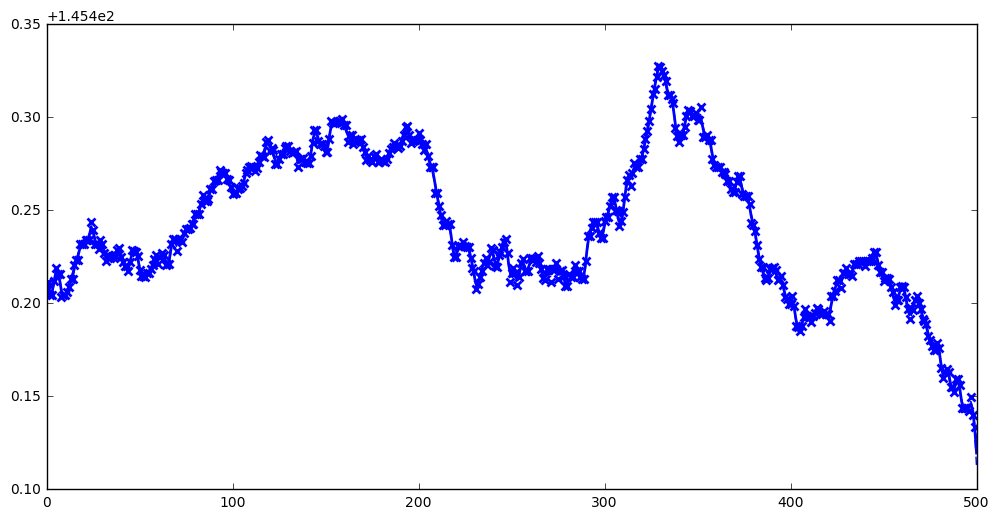

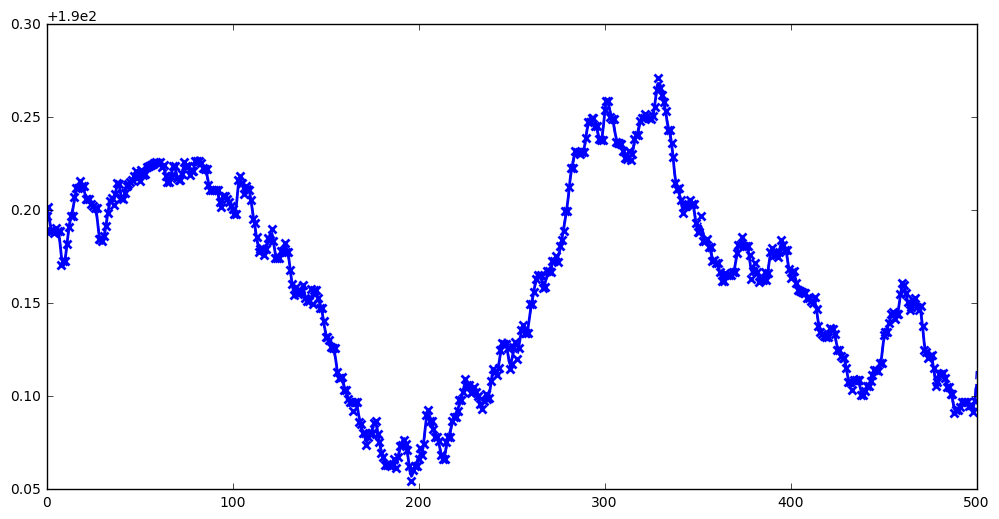

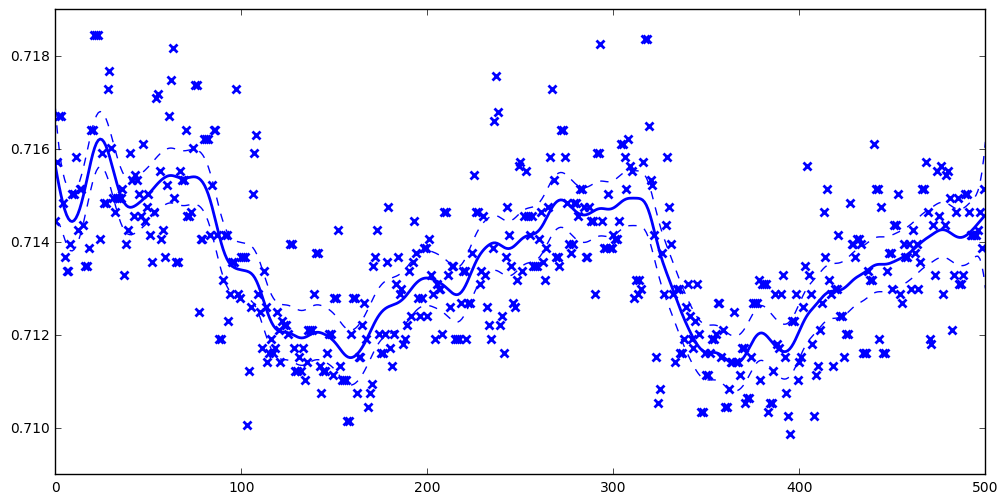

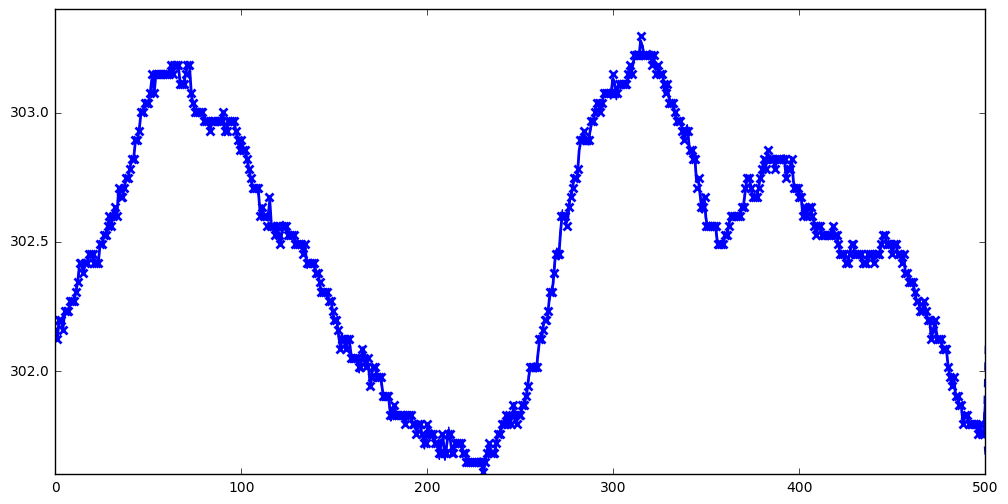

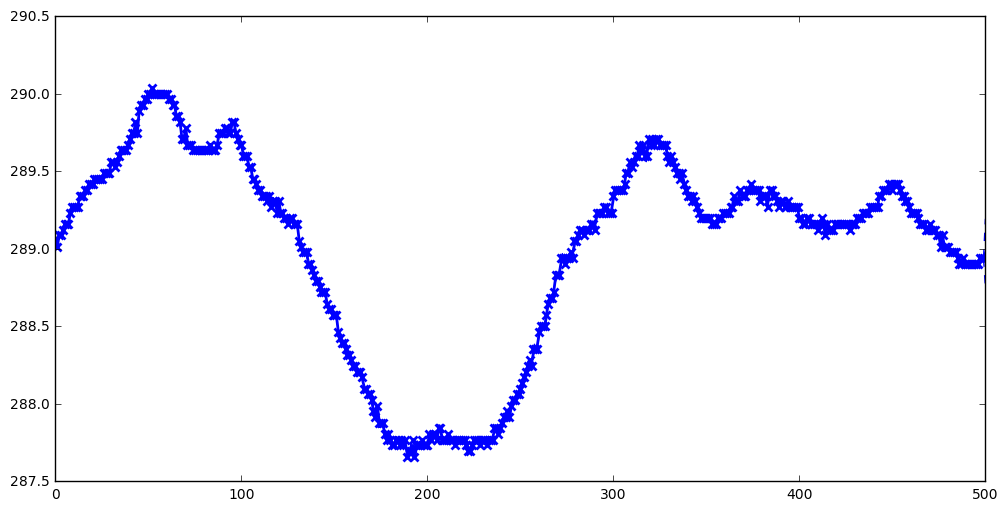

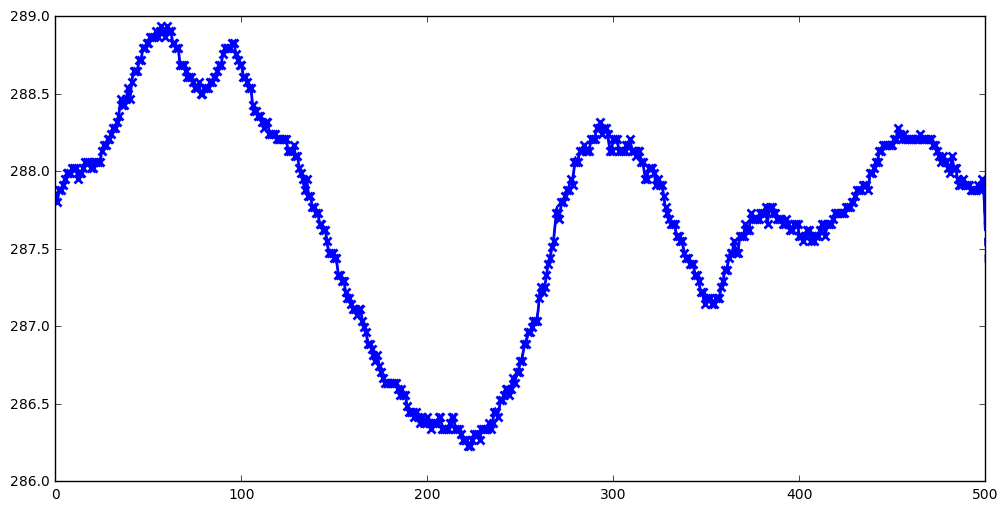

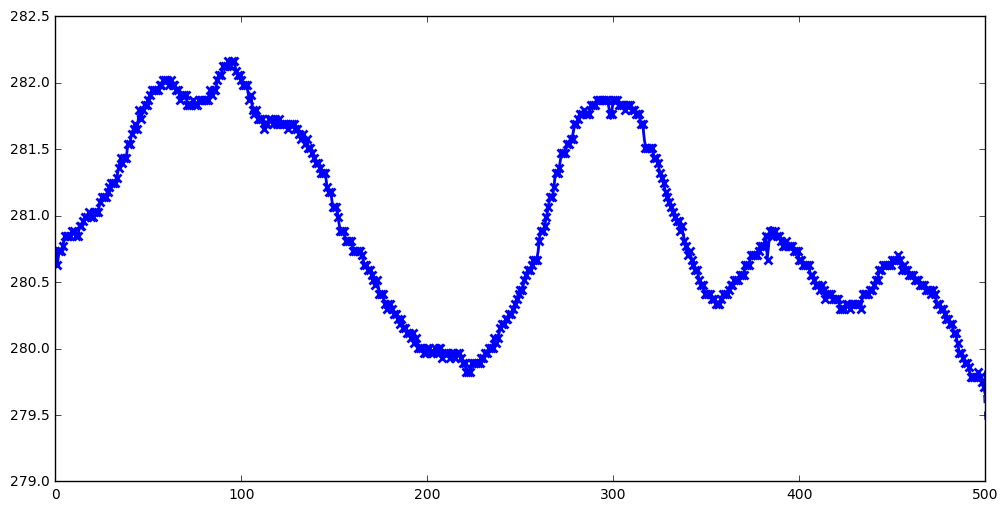

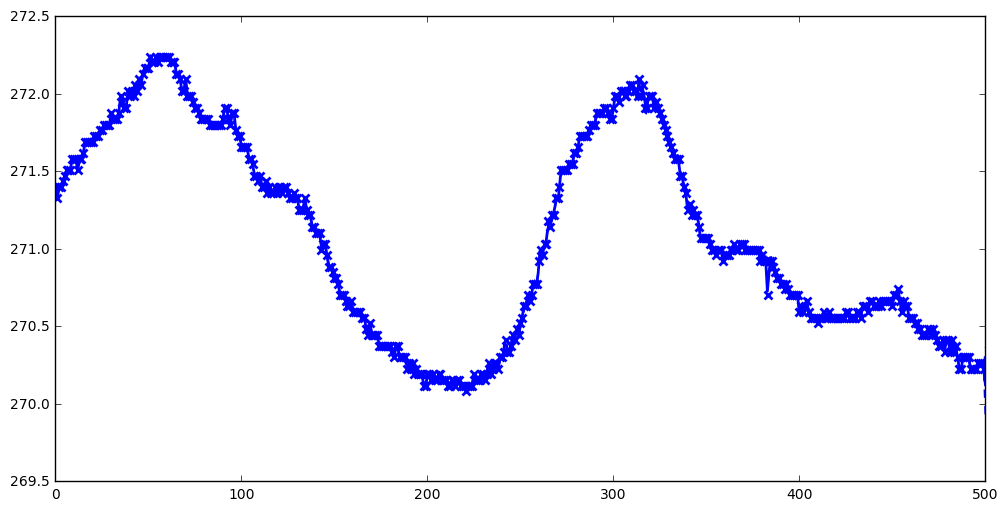

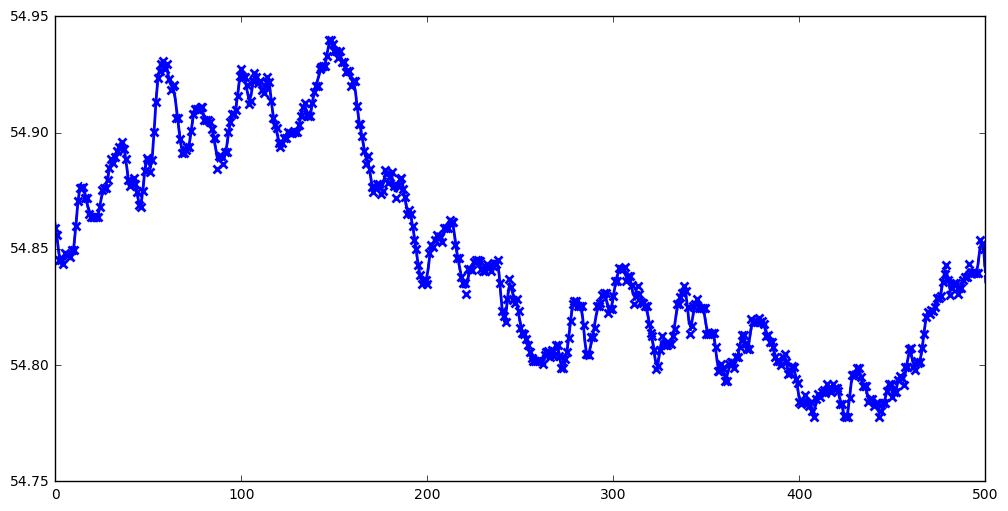

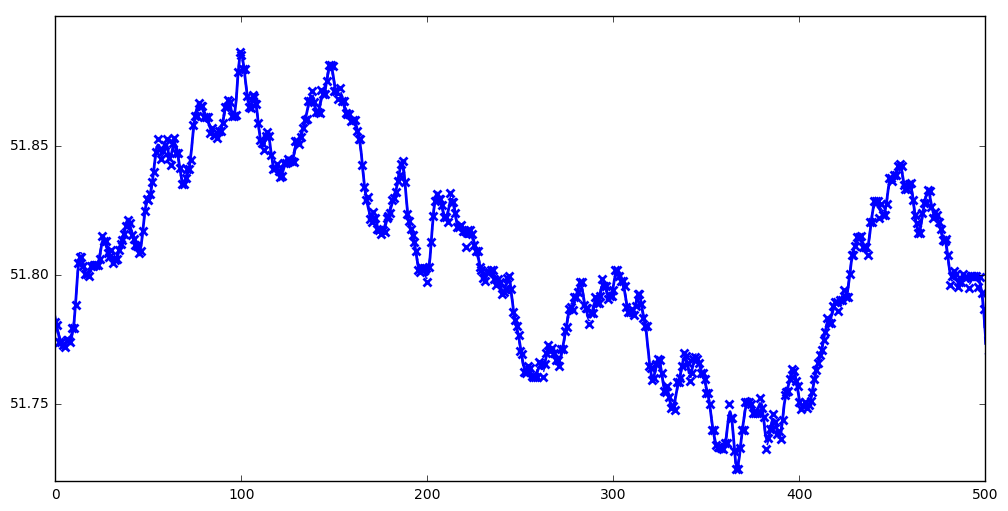

In [105]:
def plot_gp(x, mu, var, color='k'):
    plt.plot(x, mu, color=color, lw=2)
    plt.plot(x, mu + 2*np.sqrt(var), '--', color=color)
    plt.plot(x, mu - 2*np.sqrt(var), '--', color=color)

def plot(m):
    xtest = np.linspace(0, 500, 500)[:,None]
    for i in range(sensor):
        line, = plt.plot(x, DATA[:data_len,i][:,None], 'x', mew=2)
        mu, var = m.predict_f(np.hstack((xtest, np.ones_like(xtest)*i)))
        plot_gp(xtest, mu[:,0][:,None], var[:,0][:,None], line.get_color())
        plt.show()

plot(m)

In [126]:
start = data_len
test_data = 300
X_test = []
Y_test = []
x = np.arange(test_data)[:,None].astype(float)+start
sensor = 10
for i in range(sensor):
    if i==0:
        X_test.append(x[:200])
        Y_test.append(DATA[start:start+test_data-100,i][:,None])
    else:
        X_test.append(x)
        Y_test.append(DATA[start:start+test_data,i][:,None])
    
Xt,Yt,It = build_XY(X_test,Y_test)

In [127]:
m_test = gpflow.models.GPR(Xt,Yt,m.kern)

C:\Users\Woojin Cho\AppData\Local\Continuum\Anaconda3\lib\site-packages\gpflow\densities.py:89: UserWarning: Shape of x must be 2D at computation.
  warnings.warn('Shape of x must be 2D at computation.')


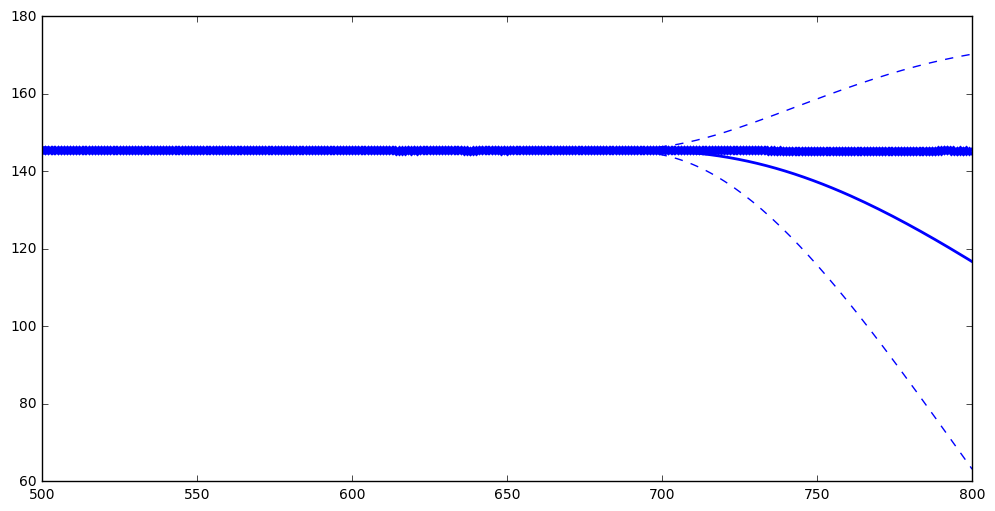

In [135]:
xtest = np.linspace(data_len, data_len+test_data, 200)[:,None]

line, = plt.plot(x, DATA[start:start+test_data,0][:,None], 'x', mew=2)
mu, var = m_test.predict_f(np.hstack((xtest, np.ones_like(xtest)*0)))
plot_gp(xtest, mu[:,0][:,None], var[:,0][:,None], line.get_color())
plt.show()

C:\Users\Woojin Cho\AppData\Local\Continuum\Anaconda3\lib\site-packages\gpflow\densities.py:89: UserWarning: Shape of x must be 2D at computation.
  warnings.warn('Shape of x must be 2D at computation.')


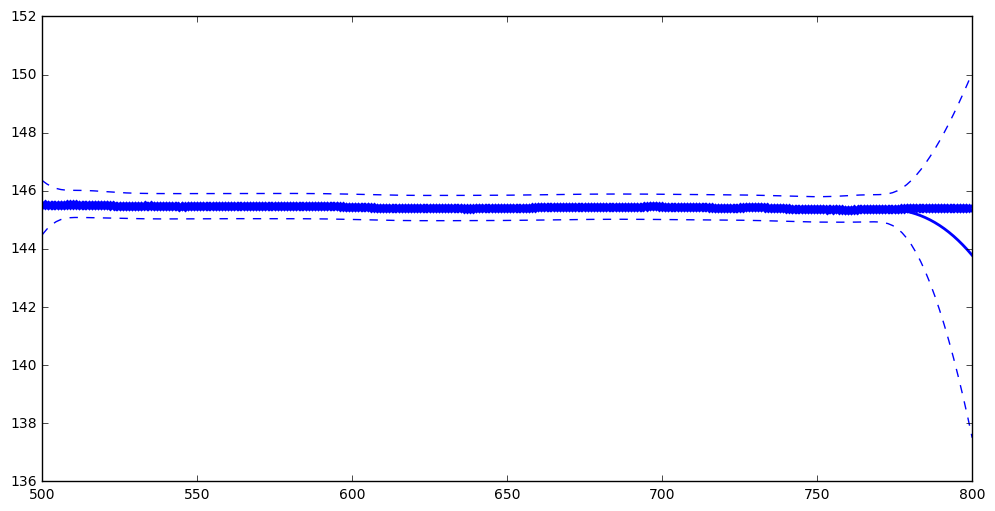

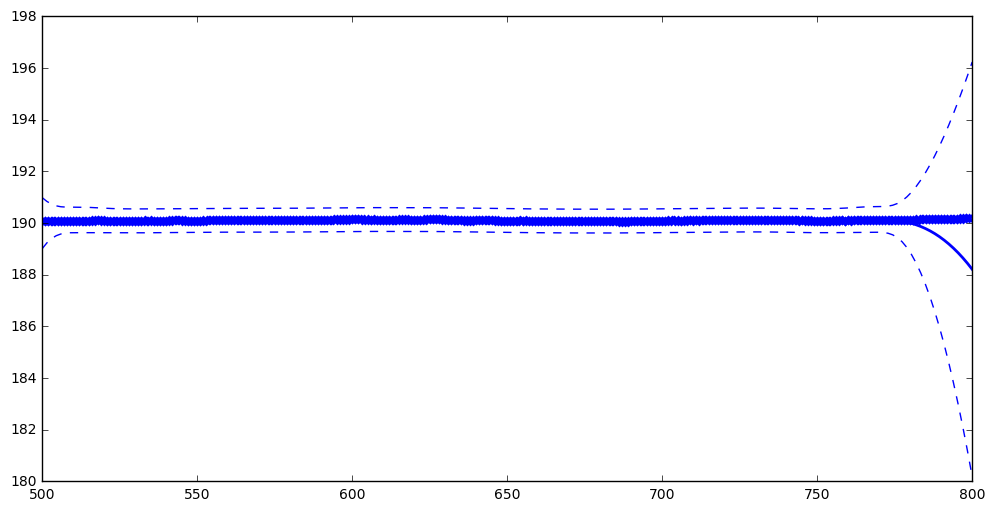

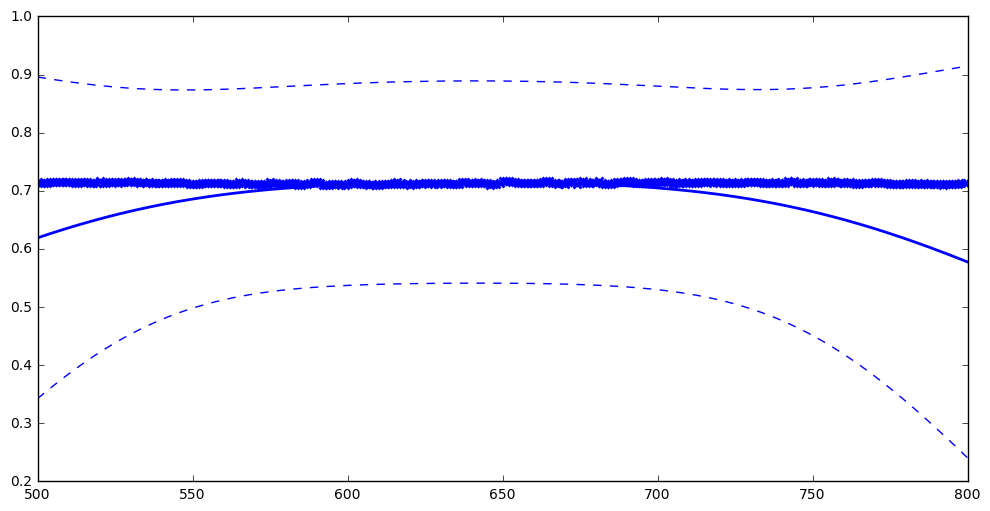

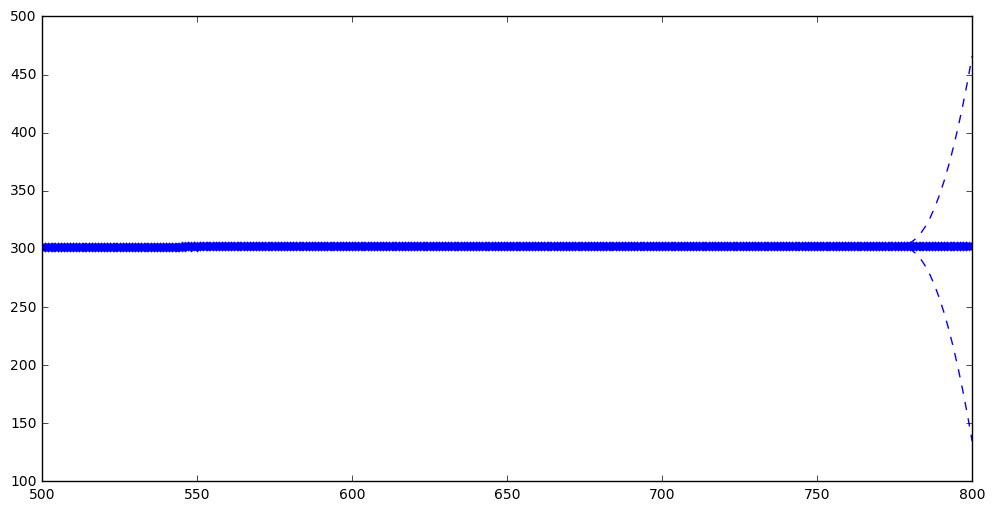

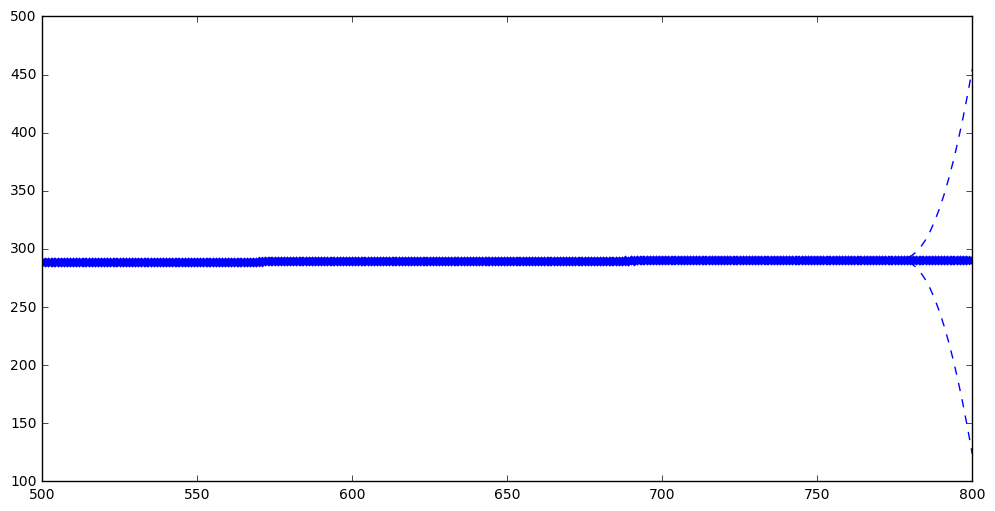

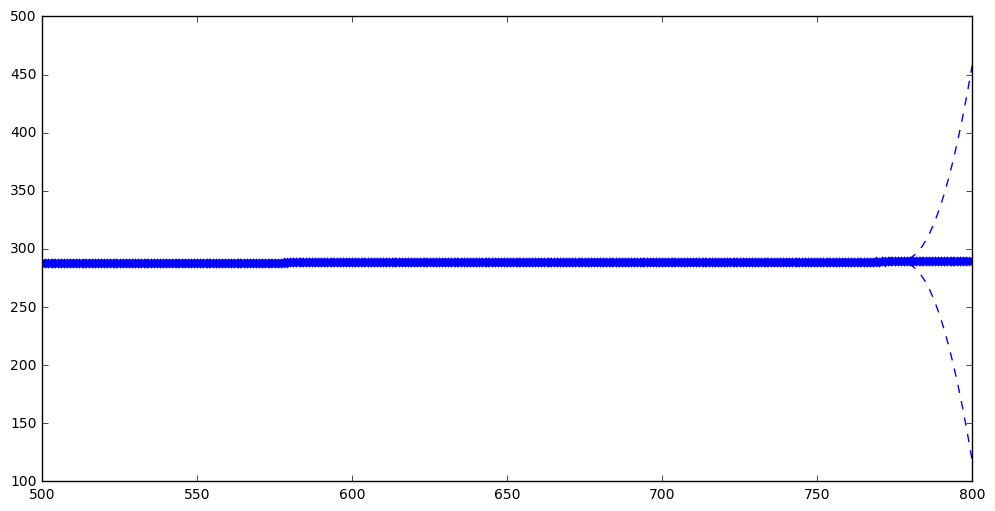

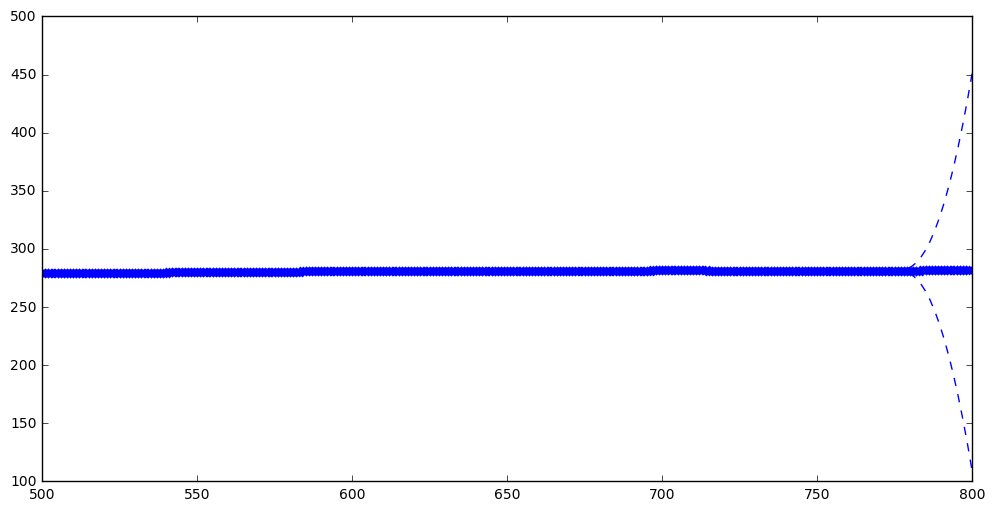

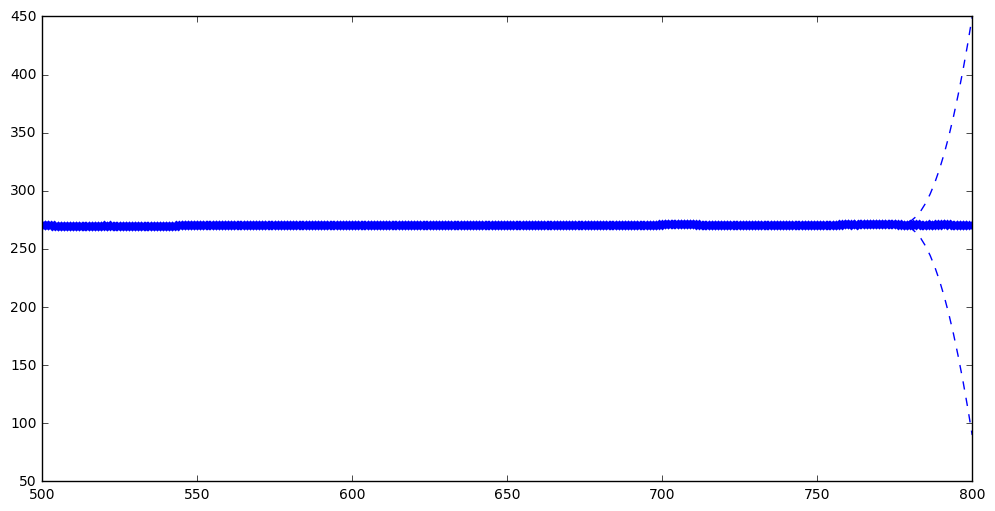

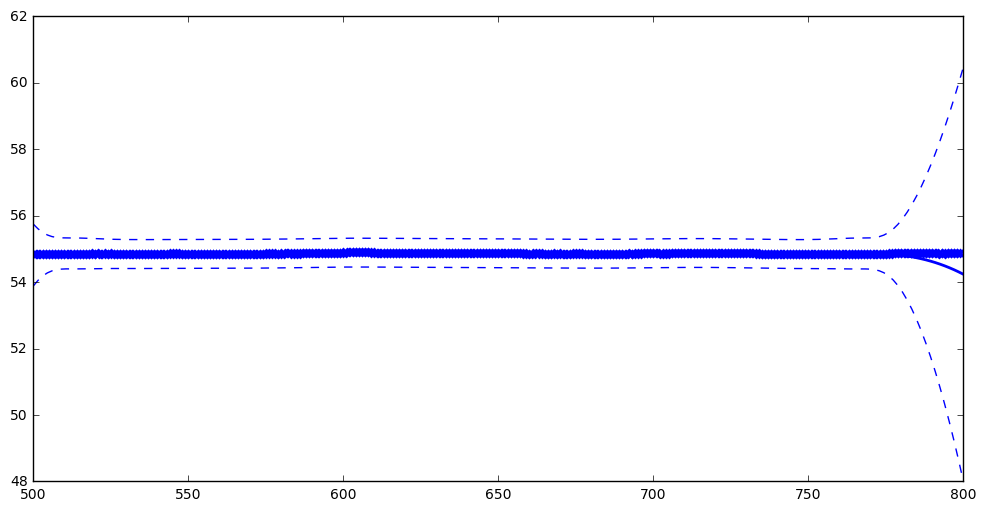

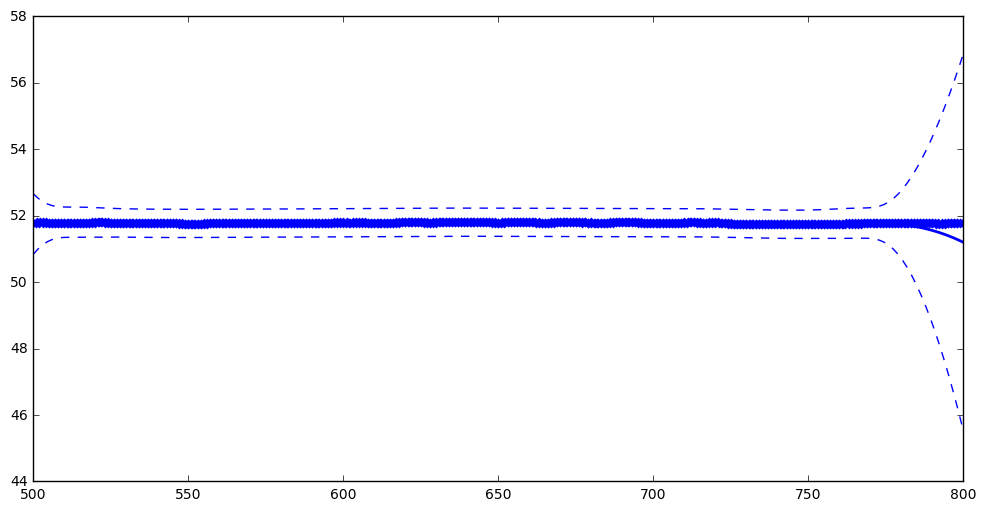

In [139]:
for j in range(sensor):
    X_test = []
    Y_test = []

    for i in range(sensor):
        if i == j:
            X_test.append(x[:280])
            Y_test.append(DATA[start:start+test_data-20,i][:,None])
        else:
            X_test.append(x)
            Y_test.append(DATA[start:start+test_data,i][:,None])

    Xt,Yt,It = build_XY(X_test,Y_test)

    m_test = gpflow.models.GPR(Xt,Yt,m.kern)

    xtest = np.linspace(data_len, data_len+test_data, 200)[:,None]

    line, = plt.plot(x, DATA[start:start+test_data,j][:,None], 'x', mew=2)
    mu, var = m_test.predict_f(np.hstack((xtest, np.ones_like(xtest)*j)))
    plot_gp(xtest, mu[:,0][:,None], var[:,0][:,None], line.get_color())
    plt.show()